# Projekt 2 - milestone 2

# Analiza zbioru danych <u>Online Shoppers Purchasing Intention</u>
# Karol Degórski, Piotr Marciniak i Paweł Niewiadowski

## Import potrzebnych pakietów

In [1]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = None

import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
import seaborn as sns

### Wczytanie danych dotyczących zakupów online

In [2]:
online_shoppers_df = pd.read_csv('online_shoppers_intention.csv')
online_shoppers_df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


## Inżynieria cech

Sprawdźmy, jak wyglądają wykresy zmiennych losowych po zlogarytmowaniu.

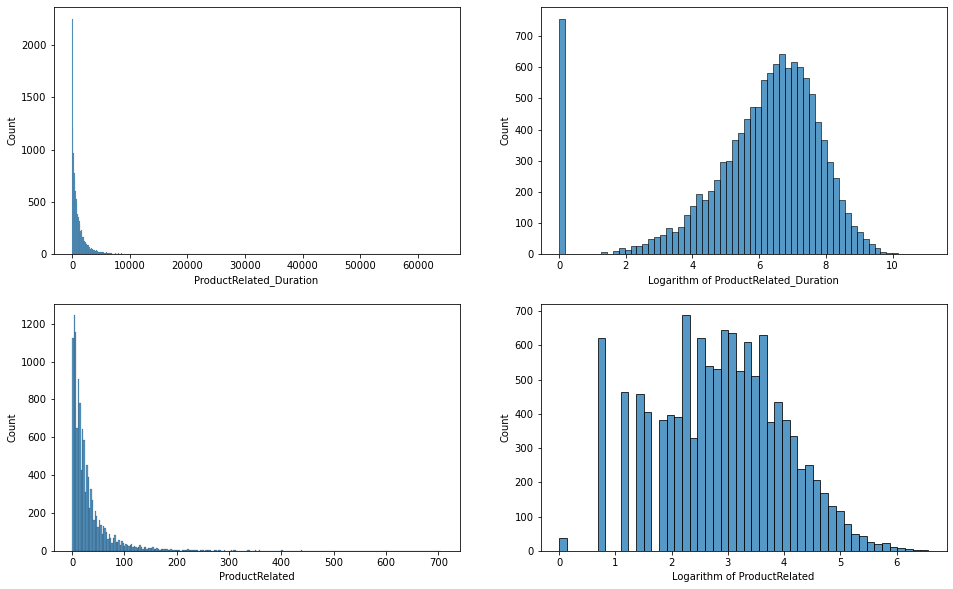

In [3]:
def comparision_logarithm(name):
    fig, ax = plt.subplots(2, 2, figsize=(16, 10))
    sns.histplot(online_shoppers_df[name + '_Duration'], ax=ax[0, 0])
    sns.histplot(online_shoppers_df[name], ax=ax[1, 0])
    sns.histplot(np.log1p(online_shoppers_df[name + '_Duration']), ax=ax[0, 1])
    ax[0, 1].set_xlabel('Logarithm of '+ ax[0, 1].get_xlabel())
    sns.histplot(np.log1p(online_shoppers_df[name]), ax=ax[1, 1])
    ax[1, 1].set_xlabel('Logarithm of ' +  ax[1, 1].get_xlabel())
    plt.show()
    
comparision_logarithm("ProductRelated")

Widzimy, że grupy bliskich wartości się ścieśniły. Zmniejszyła się skośność w obydwóch przypadkach.

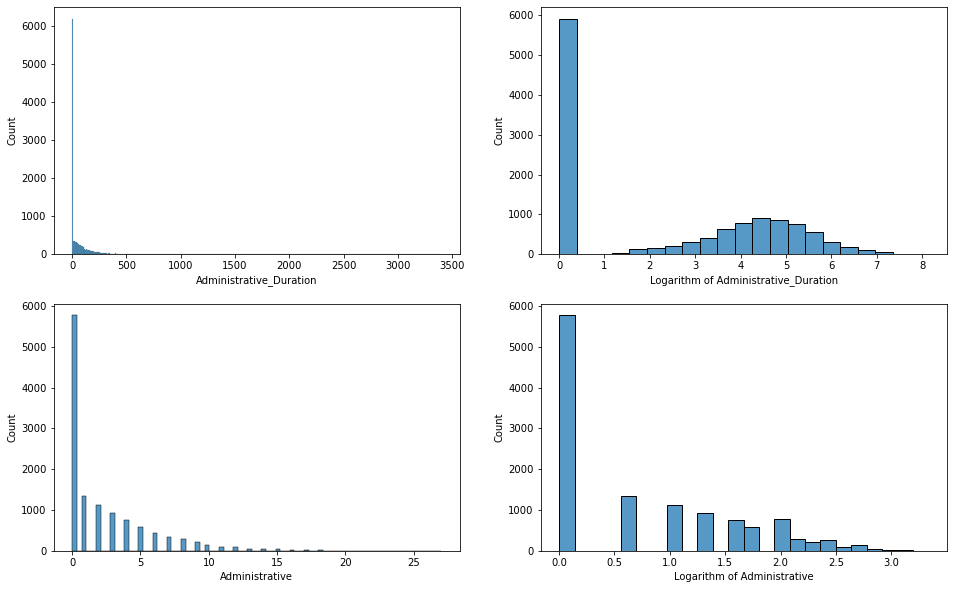

In [4]:
comparision_logarithm("Administrative")

Nie wydaje nam się, żeby tutaj logarytm coś dał. Szczególnie w przypadku Administrative, sprawdzimy jak to się sprawdzi w przypadku Administrative_Duration.

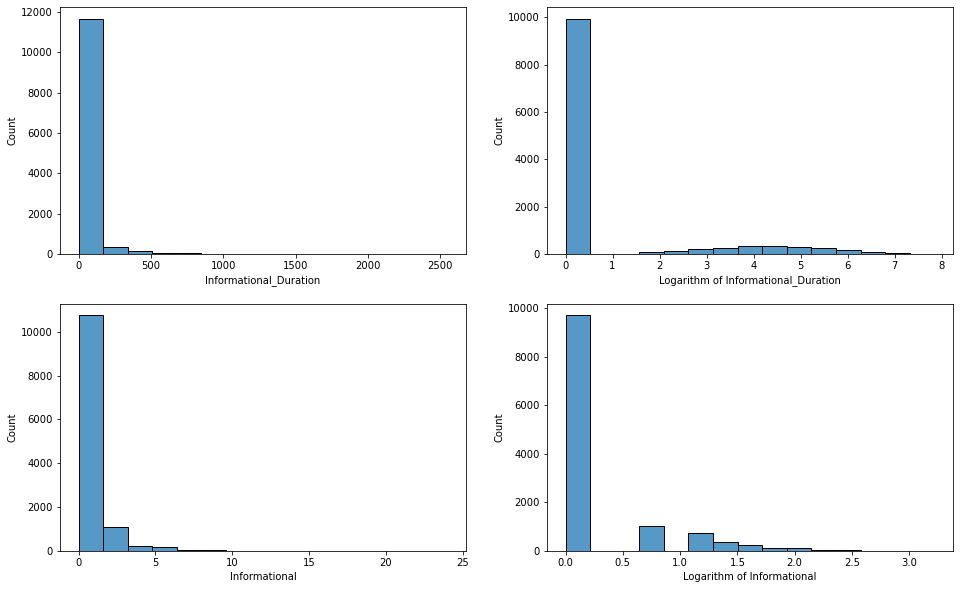

In [5]:
comparision_logarithm("Informational")

Tutaj nie wygląda, aby logarytm nam pomógł jakkolwiek w obydwóch przypadkach.

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer, OrdinalEncoder


log_features = ['ProductRelated', 'ProductRelated_Duration', 'Administrative']

System operacyjny, przeglądarkę i region nie wydaję mi się, żeby pojedyńcze integery dobrze opisywały, ponieważ co oznacza, że dana wymieniona kolumna ma liczbę 1, a druga ma liczbę 2. Co oznacza, że system, przeglądarka, region jest 2 razy większy od innego systemu, przeglądarki, region.

Miesiące za enkodujemy porządkowo, ponieważ występuje między nimi porządek.

In [7]:
ord_features = ['Month']

months = ["Jan", "Feb", "Mar", "Apr", "May", "June", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

ohe_features = ['VisitorType', 'OperatingSystems', 'Browser', 'Region'] 

# Ordinal encoding dla danych zlogarytmowanych
log_encoder = ColumnTransformer(
    [
        ('ord', OrdinalEncoder([months]), ord_features),
        ('ohe', OneHotEncoder(drop='if_binary'), ohe_features),
        ('log', FunctionTransformer(np.log1p, np.expm1), log_features)
    ],
    remainder = 'passthrough'
)

# Ordinal encoding dla danych nie zlogarytmowanych
encoder = ColumnTransformer(
    [
        ('ord', OrdinalEncoder([months]), ord_features),
        ('ohe', OneHotEncoder(drop='if_binary'), ohe_features)
    ],
    remainder = 'passthrough'
)

# One hot encoding dla danych zlogarytmowanych
log_oh_encoder = ColumnTransformer(
    [
        ('ohe', OneHotEncoder(drop='if_binary'), ohe_features + ord_features),
        ('log', FunctionTransformer(np.log1p, np.expm1), log_features)
    ],
    remainder = 'passthrough'
)

# One hot encoding dla danych nie zlogarytmowanych
oh_encoder = ColumnTransformer(
    [
        ('ohe', OneHotEncoder(drop='if_binary'), ohe_features + ord_features)
    ],
    remainder = 'passthrough'
)

Z drugiej strony wydaje nam się, że miesiące nie powinny być zakodowane ordinal encoderem, bo ciężko powiedzieć, że kwiecień jest dwa razy większy od lutego, natomiast w przypadku kodowanie one hot encoderem nie ma tego problemu. Dlatego też bardzo dobrym pomysłem jest przetestowanie obydwu rowiązań.

In [8]:
log_stand = Pipeline([
    ("log_encoded", log_encoder),
    ("stand", StandardScaler())
])

norm_stand = Pipeline([
    ("norm_encoded", encoder),
    ("stand", StandardScaler())
])

log_oh_stand = Pipeline([
    ("log_oh_encoded", log_oh_encoder),
    ("stand", StandardScaler())
])

norm_oh_stand = Pipeline([
    ("norm_oh_encoded", oh_encoder),
    ("stand", StandardScaler())
])

###  Przygotowanie funkcji zwracającej metryki

In [9]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [10]:
def plot_scores(estimator, encoder, X=online_shoppers_df, max_clusters=20):
    model = Pipeline([
                    ("enginnering", encoder),
                    ("model", estimator)
    ])
    
    cluster_num_seq = range(2, max_clusters+1)
    
    scores = [silhouette_score, calinski_harabasz_score, davies_bouldin_score]
    
    scores_values = count_clustering_scores2(X, cluster_num_seq, model, encoder, scores)
    

    plt.plot(cluster_num_seq, scores_values[silhouette_score], 'bx-')
    plt.xlabel('Liczba klastrów')
    plt.ylabel('Miara metryki silhouette')
    plt.title('Wartość miary silhouette')
    plt.show()
        
    plt.plot(cluster_num_seq, scores_values[calinski_harabasz_score], 'bx-')
    plt.xlabel('Liczba klastrów')
    plt.ylabel('Miara metryki Calinski-Harabasz')
    plt.title('Wartość miary Calinski-Harabasz')
    plt.show()
    
    plt.plot(cluster_num_seq, scores_values[davies_bouldin_score], 'bx-')
    plt.xlabel('Liczba klastrów')
    plt.ylabel('Miara metryki Davies-Bouldin')
    plt.title('Wartość miary Davies-Bouldin')
    plt.show()

In [40]:
# deprecated
def count_clustering_scores2(X, cluster_num, model, encoder, scores_fun_list):
    if isinstance(cluster_num, int):
        cluster_num_iter = [cluster_num]
    else:
        cluster_num_iter = cluster_num
        
    scores = {}    
    for x in scores_fun_list:
        scores[x] = []
        
    for k in cluster_num_iter:
        model.set_params(model__n_clusters = k)
        labels = model.fit_predict(X)
        y = encoder.fit_transform(X)
        for a in scores_fun_list:
            temp = scores[a]
            temp.append(a(y, labels))
            scores[a] = temp
    
    if isinstance(cluster_num, int):
        return scores[0]
    else:
        return scores

In [12]:
def count_clustering_scores(X, cluster_num, model, encoder, score_fun):
    if isinstance(cluster_num, int):
        cluster_num_iter = [cluster_num]
    else:
        cluster_num_iter = cluster_num
        
    scores = []    
    for k in cluster_num_iter:
        model.set_params(model__n_clusters = k)
        labels = model.fit_predict(X)
        y = encoder.fit_transform(X)
        wcss = score_fun(y, labels)
        scores.append(wcss)
    
    if isinstance(cluster_num, int):
        return scores[0]
    else:
        return scores

## Wstępne modelowanie

Dla każdego modelu będziemy sprawdzali wyniki metryk dla liczby klastrów od 1 do 20. Użyliśmy kolejne metryki
* Silhouette := Lepiej zdefiniowane klastry, wynik pomiędzy
* Calinski-Harabasz := Gęstsze i bardziej odseparowane klastry
* Davies-Bouldin := bliski zera <=> lepsze odseparowanie klastrów

### Kmeans

In [13]:
from sklearn.cluster import KMeans

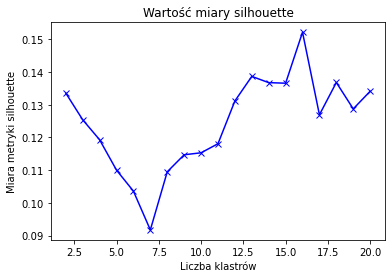

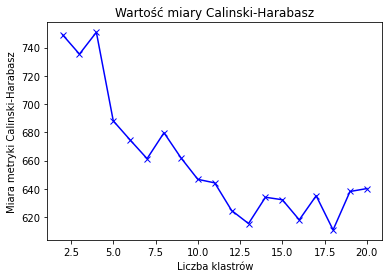

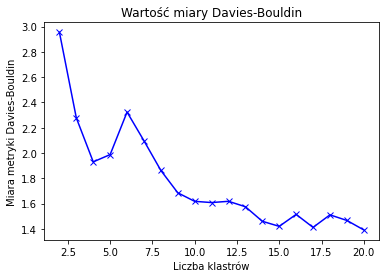

In [14]:
plot_scores(KMeans(random_state=0, n_init = 20), log_stand)

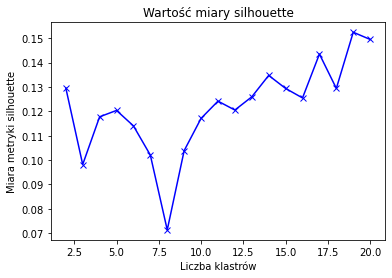

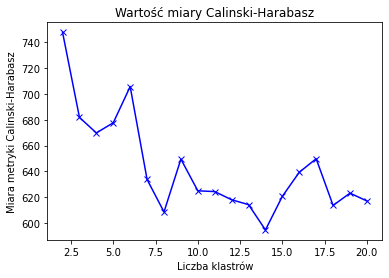

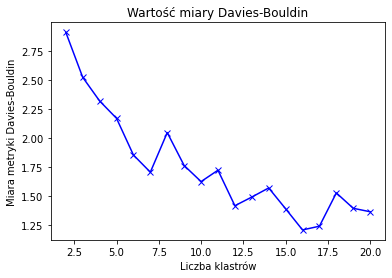

In [15]:
plot_scores(KMeans(random_state=0, n_init = 20), norm_stand)

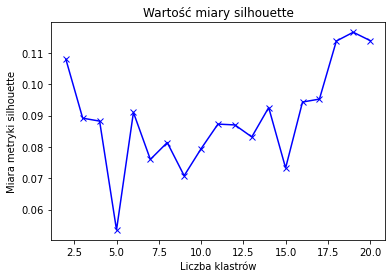

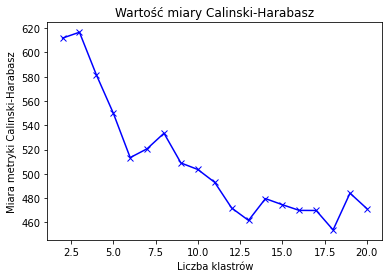

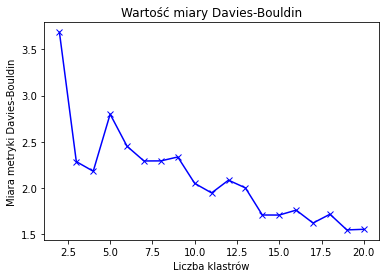

In [16]:
plot_scores(KMeans(random_state=0, n_init = 20), log_oh_stand)

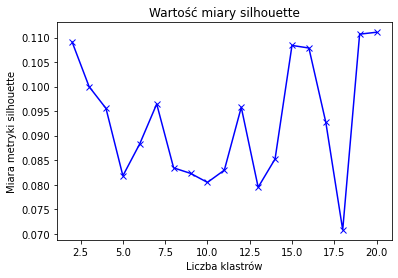

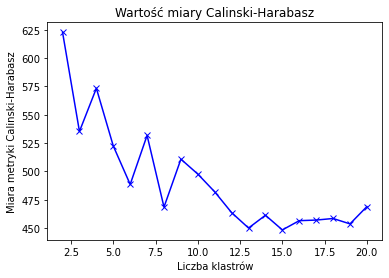

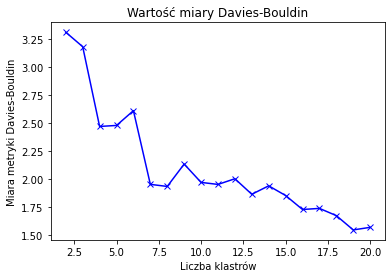

In [17]:
plot_scores(KMeans(random_state=0, n_init = 20), norm_oh_stand)

Wykorzystując różne metryki, dochodzimy do różnych wniosków odnośnie optymalnej liczby klastrów. Jednakże z tych metryk możemy wybrać subiektywnego kandydata na liczbę klastrów. </br>
Widzimy, że niezależnie od wybranego encodowania uzyskujemy słabe wyniki, jeśli chodzi o metrykę Silhouette'a i Davies'a-Bouldin'a. W przypadku KMeans widzimy, że kodowanie miesięcy *Ordinal Encoderem* pozwala nam uzyskać lepsze wyniki niż *One Hot Encoderem*. Dosyć dobre wyniki KMeans osiąga w metryce Calińskiego-Harabasza. 

### Affinity Propagation

In [18]:
from sklearn.cluster import AffinityPropagation

X = log_stand.fit_transform(online_shoppers_df)
y = AffinityPropagation().fit_predict(X)

print(f"Metryka Silhouette'a: {silhouette_score(X, y)}")
print(f"Metryka Calinskiego-Harabasza: {calinski_harabasz_score(X, y)}")
print(f"Metryka Daviesa-Bouldina: {davies_bouldin_score(X, y)}")

Metryka Silhouette'a: 0.1927035826053805
Metryka Calinskiego-Harabasza: 162.6359836831226
Metryka Daviesa-Bouldina: 1.4158949051941045


In [19]:
X = norm_stand.fit_transform(online_shoppers_df)
y = AffinityPropagation().fit_predict(X)

print(f"Metryka Silhouette'a: {silhouette_score(X, y)}")
print(f"Metryka Calinskiego-Harabasza: {calinski_harabasz_score(X, y)}")
print(f"Metryka Daviesa-Bouldina: {davies_bouldin_score(X, y)}")

Metryka Silhouette'a: 0.22439516348742028
Metryka Calinskiego-Harabasza: 164.58655660052395
Metryka Daviesa-Bouldina: 1.3516446603925514


In [20]:
X = log_oh_stand.fit_transform(online_shoppers_df)
y = AffinityPropagation().fit_predict(X)

print(f"Metryka Silhouette'a: {silhouette_score(X, y)}")
print(f"Metryka Calinskiego-Harabasza: {calinski_harabasz_score(X, y)}")
print(f"Metryka Daviesa-Bouldina: {davies_bouldin_score(X, y)}")

Metryka Silhouette'a: 0.20557725152414472
Metryka Calinskiego-Harabasza: 99.45419138951927
Metryka Daviesa-Bouldina: 1.4778388507895361


In [21]:
X = norm_oh_stand.fit_transform(online_shoppers_df)
y = AffinityPropagation().fit_predict(X)

print(f"Metryka Silhouette'a: {silhouette_score(X, y)}")
print(f"Metryka Calinskiego-Harabasza: {calinski_harabasz_score(X, y)}")
print(f"Metryka Daviesa-Bouldina: {davies_bouldin_score(X, y)}")

Metryka Silhouette'a: 0.2338201942809416
Metryka Calinskiego-Harabasza: 99.57548315725131
Metryka Daviesa-Bouldina: 1.39608785648468


Widzimy, zdecydowany wpływ enkodowania na wyniki wszystkich metryk. Najlepsze wyniki w metrykach Caliniskiego-Harabasza i metryce Daviesa-Bouldina osiągnęło enkodowanie miesięcy porządkowo oraz brak logarytmowania. Natomiast w metryce Silhouett'a najlepszy wynik dostaliśmy przy enkodowaniu miesięcy *One Hot Encoderem*.

### Modele aglomeracyjne

In [23]:
from sklearn.cluster import AgglomerativeClustering

#### Linkage single:

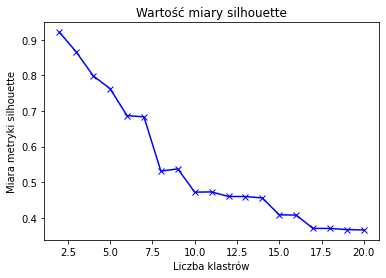

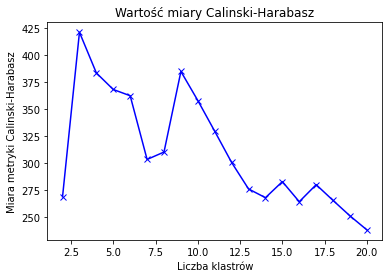

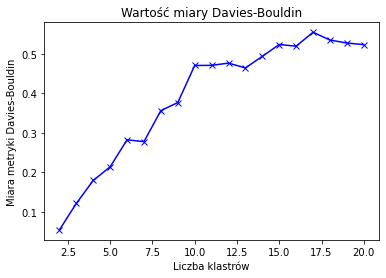

In [24]:
plot_scores(AgglomerativeClustering(linkage='single'), log_stand)

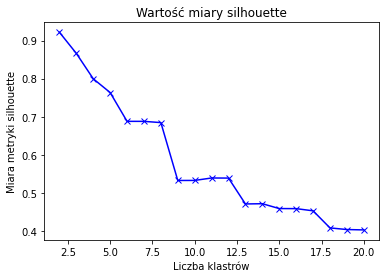

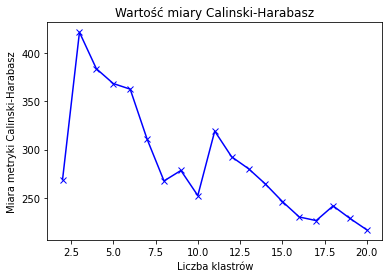

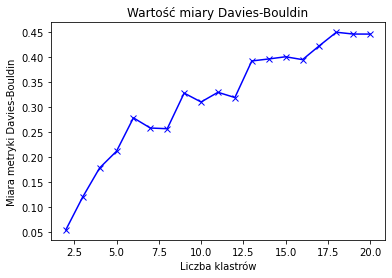

In [25]:
plot_scores(AgglomerativeClustering(linkage='single'), norm_stand)

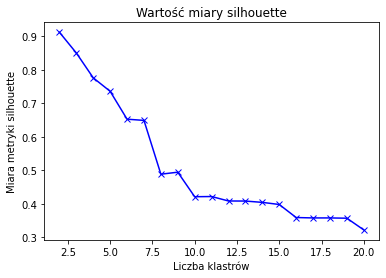

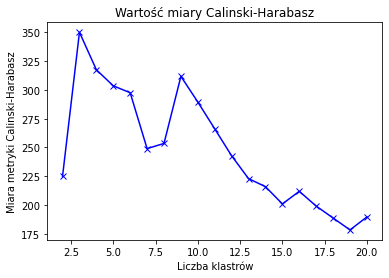

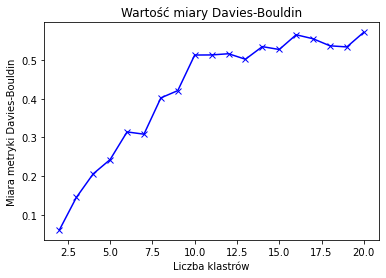

In [26]:
plot_scores(AgglomerativeClustering(linkage='single'), log_oh_stand)

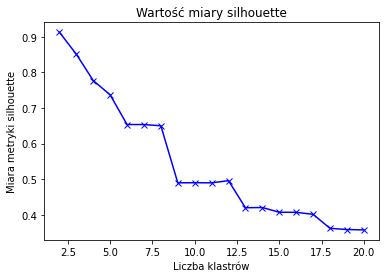

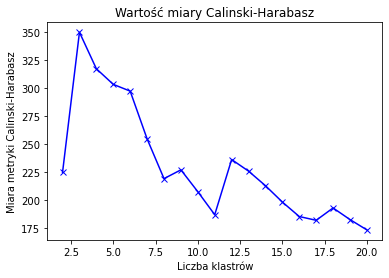

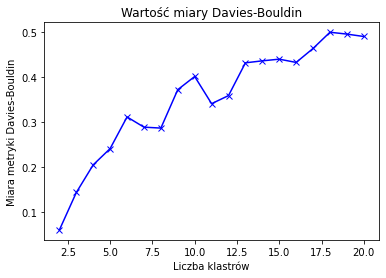

In [27]:
plot_scores(AgglomerativeClustering(linkage='single'), norm_oh_stand)

#### Linkage complete:

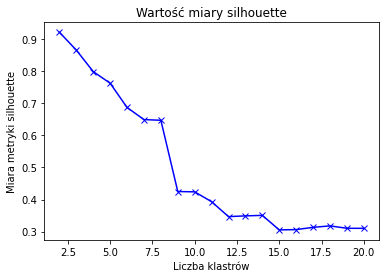

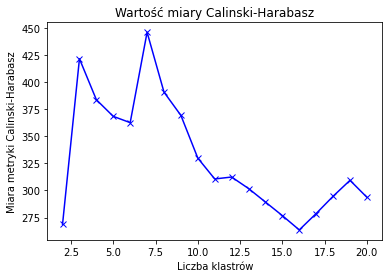

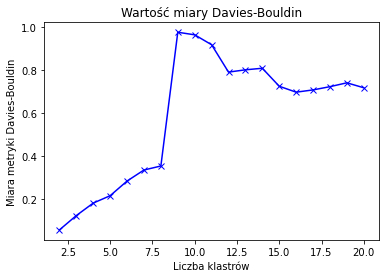

In [28]:
plot_scores(AgglomerativeClustering(linkage='complete'), log_stand)

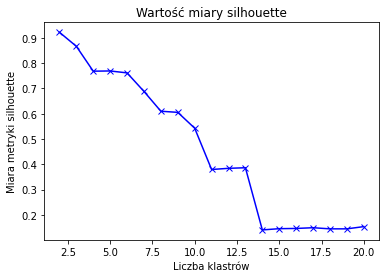

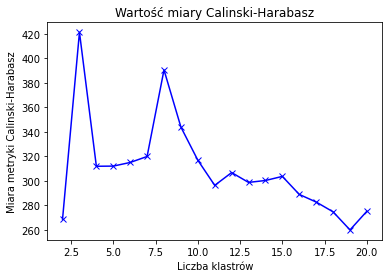

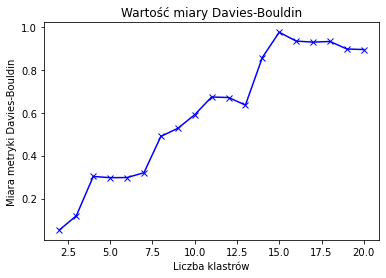

In [29]:
plot_scores(AgglomerativeClustering(linkage='complete'), norm_stand)

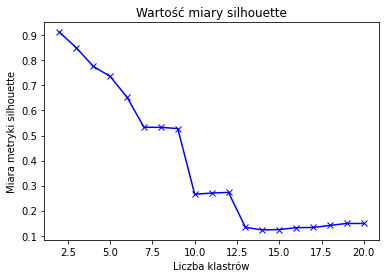

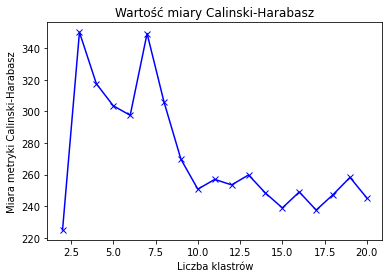

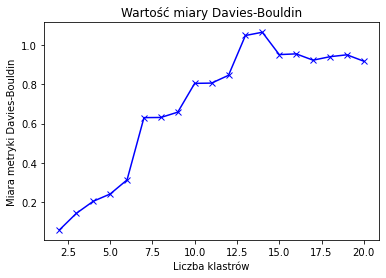

In [30]:
plot_scores(AgglomerativeClustering(linkage='complete'), log_oh_stand)

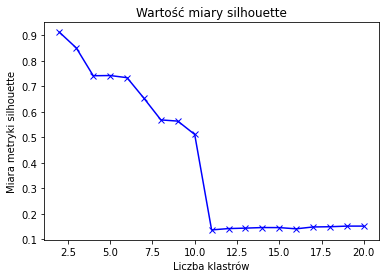

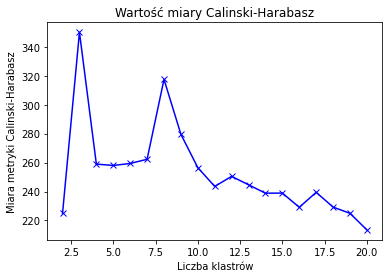

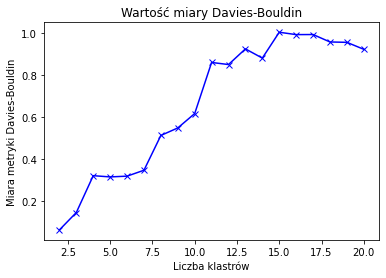

In [31]:
plot_scores(AgglomerativeClustering(linkage='complete'), norm_oh_stand)

#### Linkage average:

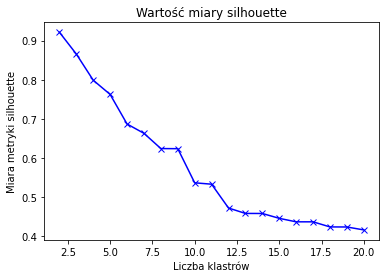

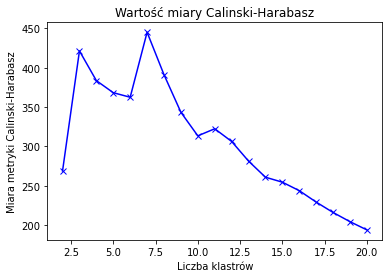

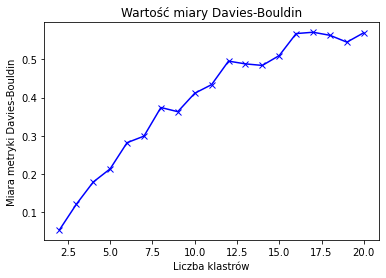

In [32]:
plot_scores(AgglomerativeClustering(linkage='average'), log_stand)

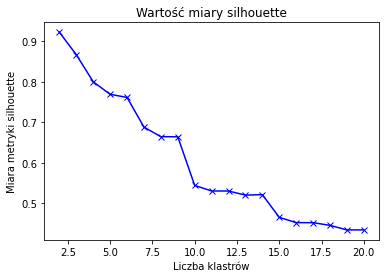

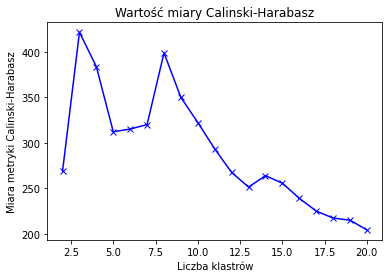

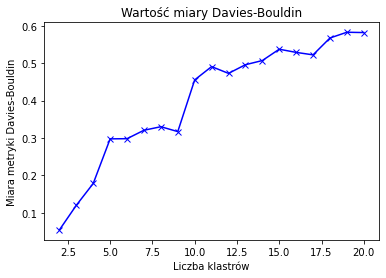

In [33]:
plot_scores(AgglomerativeClustering(linkage='average'), norm_stand)

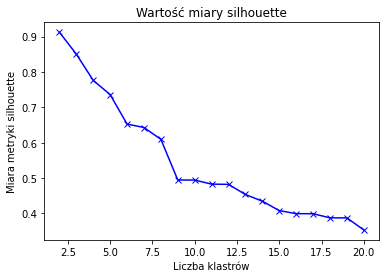

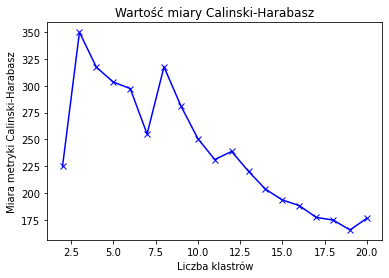

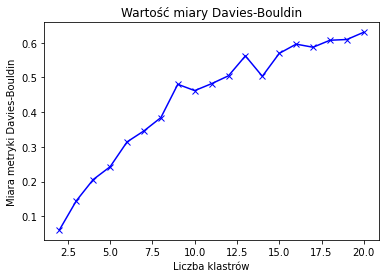

In [34]:
plot_scores(AgglomerativeClustering(linkage='average'), log_oh_stand)

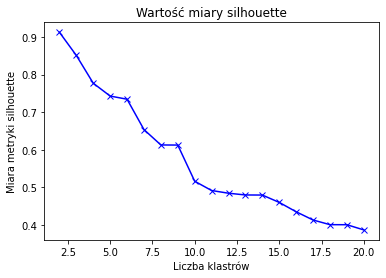

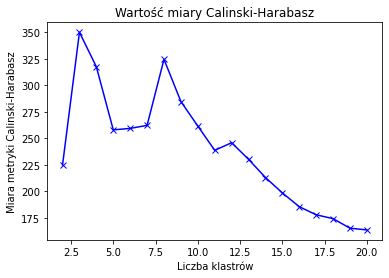

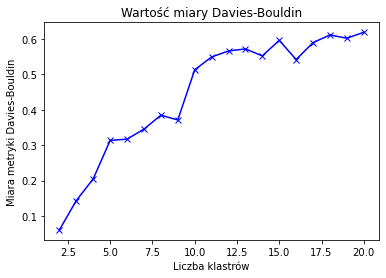

In [35]:
plot_scores(AgglomerativeClustering(linkage='average'), norm_oh_stand)

#### Linkage ward:

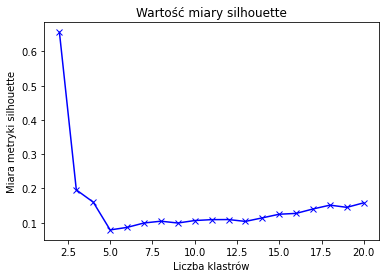

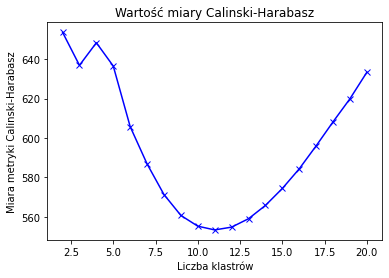

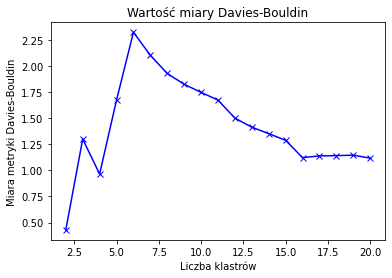

In [36]:
plot_scores(AgglomerativeClustering(linkage='ward'), log_stand)

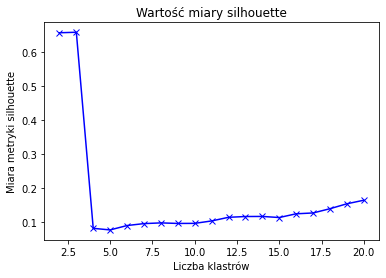

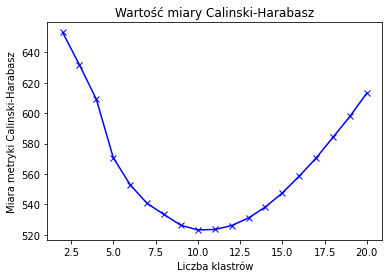

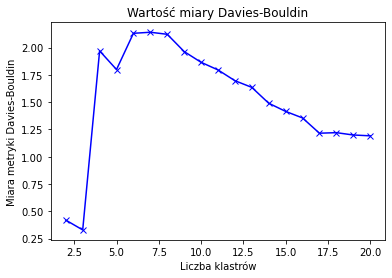

In [37]:
plot_scores(AgglomerativeClustering(linkage='ward'), norm_stand)

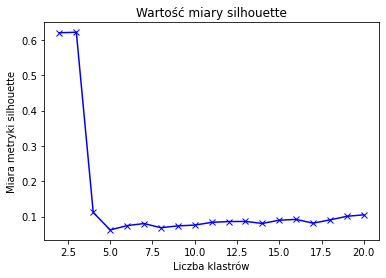

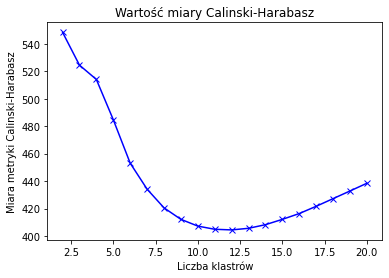

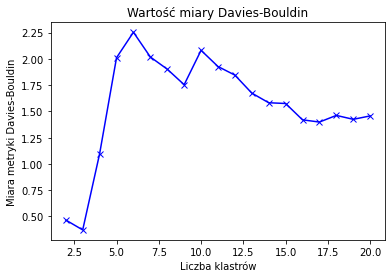

In [38]:
plot_scores(AgglomerativeClustering(linkage='ward'), log_oh_stand)

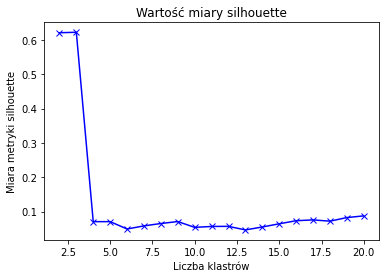

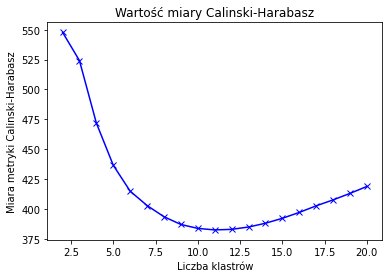

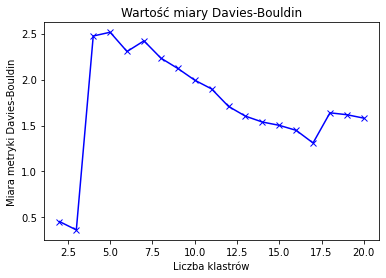

In [39]:
plot_scores(AgglomerativeClustering(linkage='ward'), norm_oh_stand)

**We wszystkich przypadkach wybrane metryki sugerują optymalną ilość klastrów równą 2 (lub 3 przez wysoki peak w Calinski-Harabasz w modelach z linkage różnym od ward).** Poza tym, że miesiące lepiej zakodować porządkowo, nie widać większych różnic pomiędzy enkodowaniami. Widzimy spadek w przypadku zmiany z 2 na 3 w miarze Silhouette'a, który odzwierciedla się we wzroście indeksu Calińskiego-Harabasza (dla wszystkich łączeń poza Wardem).

### Wizualizacja najlepiej działających modeli - PCA
Naszym zdaniem najlepiej spisała się klasteryzacja metodą aglomeracyjną z łączeniem complete przy enkodowaniu logarytmicznym, miesiące zakodowane porządkowo oraz metodą aglomeracyjną z łączeniem Warda.

In [67]:
from sklearn.decomposition import PCA
import plotly.express as px

In [68]:
def draw(model, encoder):
    pca = PCA(n_components=2)
    online_shoppers_pca = pca.fit_transform(encoder.fit_transform(online_shoppers_df))
    
    pipe = Pipeline([
        ("enginnering", log_stand),
        ("model", model)
    ])

    y = pipe.fit_predict(online_shoppers_df)
    unique, counts = np.unique(y, return_counts=True)
    for k in range(len(unique)):
        print(unique[k], counts[k])
    sns.scatterplot(online_shoppers_pca[:,0], online_shoppers_pca[:,1], hue = y, palette='tab20')
    plt.show()

0 12323
1 1
2 6


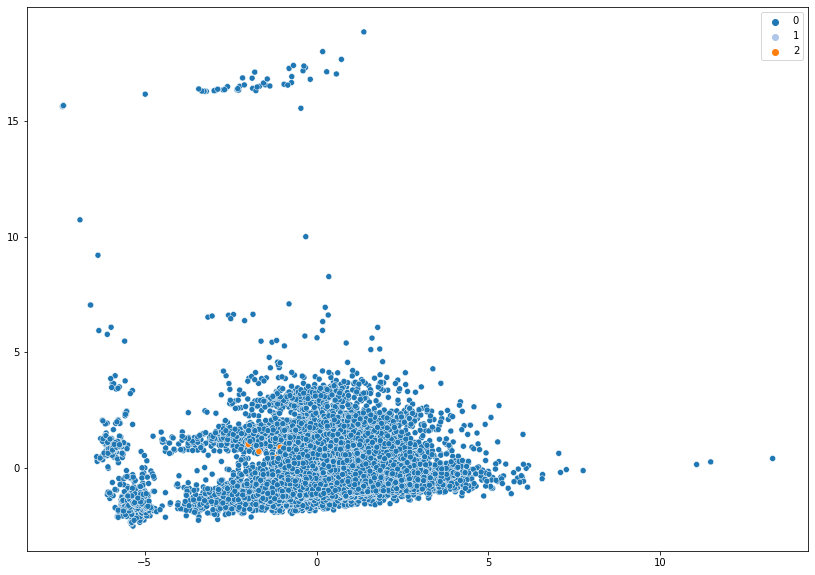

In [69]:
plt.figure(figsize=(14, 10))
draw(AgglomerativeClustering(linkage='complete', n_clusters=3), log_stand)

0 670
1 53
2 11607


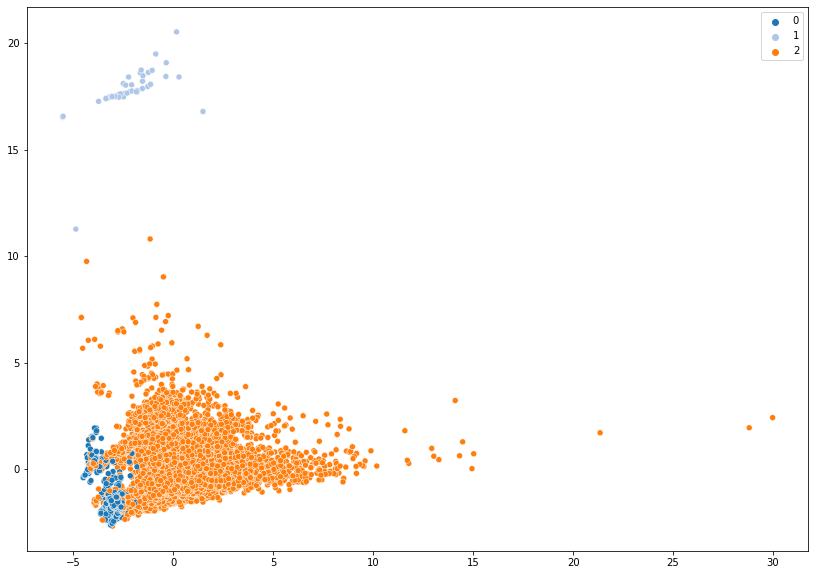

In [70]:
plt.figure(figsize=(14, 10))
draw(AgglomerativeClustering(linkage='ward', n_clusters=3), norm_stand)

0 1905
1 576
2 389
3 3974
4 1002
5 1849
6 55
7 163
8 173
9 6
10 668
11 49
12 787
13 294
14 433
15 7


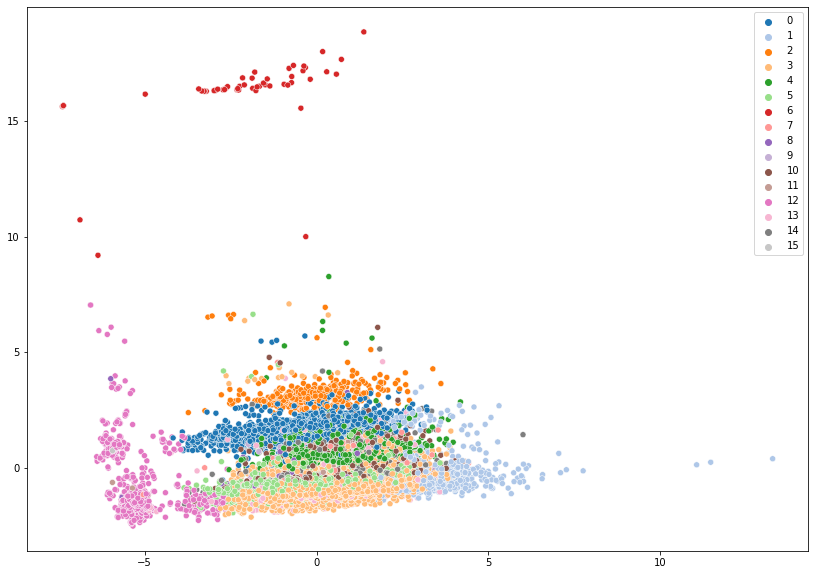

In [71]:
plt.figure(figsize=(14, 10))
draw(KMeans(n_clusters=16, n_init=20, random_state=0), log_stand)

0 6
1 1
2 17
3 2
4 8
5 10
6 6
7 8
8 11
9 12
10 59
11 69
12 7
13 45
14 47
15 44
16 97
17 11
18 18
19 5
20 3
21 10
22 5
23 14
24 6
25 17
26 64
27 9
28 23
29 19
30 19
31 10
32 24
33 24
34 7
35 7
36 3
37 55
38 7
39 38
40 12
41 37
42 16
43 17
44 10
45 22
46 13
47 8
48 38
49 19
50 24
51 26
52 20
53 5
54 35
55 16
56 37
57 18
58 32
59 63
60 10
61 48
62 38
63 46
64 12
65 42
66 24
67 113
68 23
69 26
70 12
71 23
72 7
73 18
74 24
75 15
76 21
77 24
78 16
79 61
80 12
81 34
82 12
83 18
84 17
85 51
86 30
87 16
88 30
89 35
90 1
91 10
92 14
93 26
94 5
95 55
96 13
97 17
98 2
99 3
100 4
101 11
102 18
103 8
104 32
105 3
106 21
107 13
108 9
109 38
110 14
111 52
112 31
113 28
114 8
115 3
116 42
117 6
118 13
119 29
120 19
121 20
122 24
123 23
124 26
125 1
126 31
127 13
128 26
129 12
130 31
131 6
132 15
133 58
134 46
135 31
136 7
137 11
138 25
139 28
140 37
141 39
142 50
143 23
144 16
145 43
146 22
147 33
148 34
149 11
150 37
151 30
152 20
153 24
154 20
155 15
156 12
157 7
158 28
159 5
160 34
161 23
162 16
163

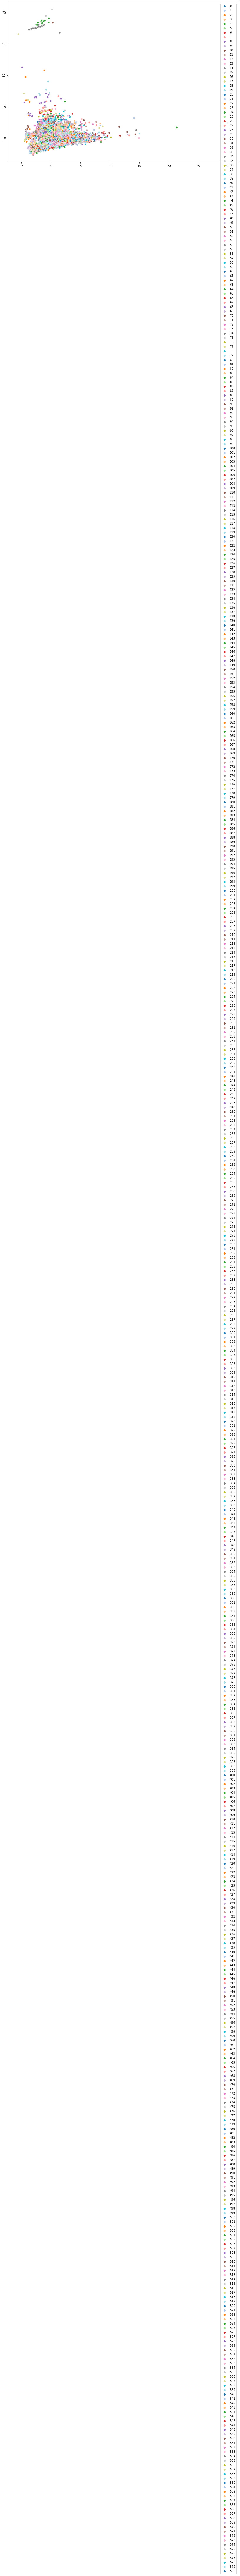

In [72]:
plt.figure(figsize=(14, 10))
draw(AffinityPropagation(), norm_stand)

Affinity Propagation ze względu na ilość klastrów nie wydaję się przydatny.

Po narysowaniu i zwróceniu liczności widzimy, że nasze spostrzeżenia z metryk nie do końca zwracają zadowalające efekty. Być może powinniśmy, się bardziej skupić na wynikach osiąganych przez metrykę Calińskiego-Harabasza, bo te które osiągają w niej lepsze efekty zwracają sensowniejszy podział na klastry.

## Podsumowanie

Widzimy, że 
* modele hierarchiczne lepiej sobie radzą od modeli niehierarchicznych, jeśli chodzi o metryki, niekoniecznie w rzeczywistości,
* kodowanie miesięcy porządkowo w większości przypadków dawało lepsze wyniki,
* metryki nie oddają tego, co zwraca nam narysowanie zrzutowanych wykresów.

Chcemy, sprawdzić
* PCA wykresy 3-wymiarowe,
* metody hierarchiczne bez podawania liczby klastrów takie jak DBSCAN, OPTICS, BIRCH,
* porównać nasze wyniki z licznością labeli.
* metody zwracające mało liczne klastry, spróbujemy te mało liczne potraktować jak outliery i spróbować tej samej metody